In [4]:

'''
* Author           : Anjana Tiha
* Assignment No    : #5 
* Course           : Natural Language Processing (COMP 8780)
* Semester         : Spring 2018
* Course Instructor: Professor Visali Rus
* University       : University of Memphis 
* Deadline         : Due Mar. 15, 2018.
*
* Description      : 1. From the SnapshotBROWN.pos.all.txt file extracted all word types and their frequencies.
*                    2. Sorted the list of word types in decreasing order based on their frequency.
*                    3. Drew a chart showing the relationship between the rank in the ordered list and the frequency (Zipf's Law). 
*                       (Do not stem but do ignore punctuation.)
*                    4. Generated a Bigram Grammar from the above file.
*                    5. Performed add-one smoothing. 
*                    6. Showed the grammar before and after smoothing for the sentence "A similar resolution passed in the Senate".
* Comments         : Work under progress for above description.
* Tools Requirement: Anaconda, Python 
* Current Version  : v1.0.0.3
* Version History  : v1.0.0.0
*                    v1.0.0.1
*                    v1.0.0.2
*                    v1.0.0.3
*                    v1.0.0.4
*                    v1.0.0.5
* Last Update      : 04.07.2018 (Time : 05:45 P.M)

'''

'\n* Author           : Anjana Tiha\n* Assignment No    : #5 \n* Course           : Natural Language Processing (COMP 8780)\n* Semester         : Spring 2018\n* Course Instructor: Professor Visali Rus\n* University       : University of Memphis \n* Deadline         : Due Mar. 15, 2018.\n*\n* Description      : 1. From the SnapshotBROWN.pos.all.txt file extracted all word types and their frequencies.\n*                    2. Sorted the list of word types in decreasing order based on their frequency.\n*                    3. Drew a chart showing the relationship between the rank in the ordered list and the frequency (Zipf\'s Law). \n*                       (Do not stem but do ignore punctuation.)\n*                    4. Generated a Bigram Grammar from the above file.\n*                    5. Performed add-one smoothing. \n*                    6. Showed the grammar before and after smoothing for the sentence "A similar resolution passed in the Senate".\n* Comments         : Work under pr

In [5]:
'''
Question 

ASSIGNMENT #5: DUE: April 12!
==============

Goal: Familiarize with statistical methods and properties of language.

Remember the homework is due by midnight on the due date via email to the TA!
_________________________________________________________________

1. [10 points] From the SnapshotBROWN.pos.all.txt file extract all
   word types and their frequencies. Sort the list of word types in 
   decreasing order based on their frequency. Draw a chart showing the
   relationship between the rank in the ordered list and the frequency
   (Zipf's Law). Do not stem but do ignore punctuation.

-----------------------------------------------------------------

2. [20 points] Generate a Bigram Grammar from the above file. Perform
   add-one smoothing. Show the grammar before and after smoothing for
   the sentence "A similar resolution passed in the Senate".

*****************************************************************


'''


'\nQuestion \n\nASSIGNMENT #5: DUE: April 12!\n==============\n\nGoal: Familiarize with statistical methods and properties of language.\n\nRemember the homework is due by midnight on the due date via email to the TA!\n_________________________________________________________________\n\n1. [10 points] From the SnapshotBROWN.pos.all.txt file extract all\n   word types and their frequencies. Sort the list of word types in \n   decreasing order based on their frequency. Draw a chart showing the\n   relationship between the rank in the ordered list and the frequency\n   (Zipf\'s Law). Do not stem but do ignore punctuation.\n\n-----------------------------------------------------------------\n\n2. [20 points] Generate a Bigram Grammar from the above file. Perform\n   add-one smoothing. Show the grammar before and after smoothing for\n   the sentence "A similar resolution passed in the Senate".\n\n*****************************************************************\n\n\n'

In [9]:
import re
import os
import operator
from collections import OrderedDict
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [10]:

# read file line by line/ splits by line
def read_file_line_by_line(filename):             
	with open(filename, 'r', encoding="utf8") as content_file:
		content = content_file.readlines()
	return content

# removes file
def remove_file(path):
	try:
		os.remove(path)
		return 1
	except OSError:
	#except WindowsError:
		print("failed removing: " + path)
		return 0
    
    
# converts text to lowercase
def to_lower(text):
	return text.lower()

# remove all the characters except alphabetical
# removes special characters and numerical charcharters
def remove_non_alpha(text):
    return re.sub(r'[^a-zA-Z0-9]', '', text)

# remove all the characters except alphabetical
# removes special characters and numerical charcharters
def remove_non_alpha_no_space(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

# sort dictionary by key or value
def sort_dict(dict_x, type_s):
    if type_s == "key":
        return sorted(dict_x.items(), key=operator.itemgetter(0))

    elif type_s == "val":
        return OrderedDict(sorted(dict_x.items(), key=operator.itemgetter(1), reverse=True))

    else:
        return OrderedDict(sorted(dict_x.items(), key=operator.itemgetter(0), reverse=True))
    

# read annotated file with pos
# clean file and save text in pos: word format 
def get_pos_word(text, output_file):
	blacklist = ["-NONE-", "-LRB-", "-RRB-"]  
	eof_txt = "(TOP END_OF_TEXT_UNIT)"
	i = 0
	current_line = ""
	remove_file(output_file)
	
	with open(output_file, 'a') as the_file:

		for line in text:

			if eof_txt in line:
				current_line = current_line.strip()

				if current_line != "":
					the_file.write(current_line + "\n")

				current_line = ""
				continue

			else:
				temp = line.rsplit('(')
				temp = temp[len(temp)-1] 
				temp = temp.rsplit(')')
				temp = temp[0]
				#temp = temp.strip()
				pass_iter = 0

				for item in blacklist:
					if item in temp:
						pass_iter = 1
						break

				if pass_iter == 1:
					continue
				else:
					#temp_test = re.sub(r'[^a-zA-Z0-9]', ' ', temp) 
					#temp_test = remove_all_space(temp_test)
					temp_test  = temp

					if temp_test == "":
						continue
					else:
						temp_vocab = temp.split() 

						if len(temp_vocab) == 2:
							temp = temp.strip()
							current_line += temp + " "  



# get frequency of each word in a document
def get_word_freq(text):
    pos = ""
    word_freq = {}

    for line in text:
        line = line.strip()
        temp = line.split(" ")

        for i in range(len(temp)):
            if temp[i] == "\n":
                pos = ""
                continue
            
            if i%2 == 0:
                pass

            else:
                vocab = temp[i]
                vocab = remove_non_alpha(vocab)
                vocab = vocab.strip()
                
                if vocab.strip() == "" or vocab.strip() == '':
                    pass
                
                else:
                    vocab = to_lower(vocab)

                    if vocab in word_freq:
                        word_freq[vocab] +=1 
                    
                    else:
                        word_freq[vocab] = 1 
    return word_freq


# get frequency of each word in a document
def get_bigram(text):
    bi_gram = {}
    
    first = ""
    second = ""
    
    w_c = 0
    c = 0

    for line in text:
        line = line.strip()
        temp = line.split(" ")

        for i in range(len(temp)):
            if temp[i] == "\n":
                first = ""
                second = ""
                pass

            else:
                if i%2==1:
                    vocab = temp[i]
                    vocab = remove_non_alpha(vocab)
                    vocab = vocab.strip()
                    vocab = to_lower(vocab)
                   
                    if vocab.strip()!="":
                        if first == "":
                            first = vocab
                            second = ""
                       
                        elif second =="":
                            second = vocab
                         
                            if (first, second) in bi_gram:
                                bi_gram [first, second] += 1
                            else:
                                bi_gram [first, second] = 1
                           
                            first = ""
                            second = ""
                        
                        else:
                            first = vocab
                            second = ""
                    
    return bi_gram


# get smoothed frequency for bigram in a document
def get_smoothed_bigram(word_pos, bi_gram):
    smoothed_bigram = {}
    voc_size = len(word_pos)

    for bi_gram_u in bi_gram:
        smoothed_bigram[bi_gram_u] = (bi_gram[bi_gram_u]+1)/(word_pos[bi_gram_u[0]]+voc_size)
    
    return smoothed_bigram

# print bigram
def print_bigram(bi_gram, smoothed_bigram, count):
    i = 0
    
    for key in bi_gram:
        i +=1
        print("------------------------------------------------------------------")
        print("%s: Count - %s, Smoothed Count - %.4f" %(key, bi_gram[key], smoothed_bigram[key]))
      
        if i > count and count !=-1:
            break
    print("------------------------------------------------------------------")
    
    
# draw frequency distribution and assimilate with zip_f
def draw_zip_f(word_pos, title, x_label, y_label, image_name):
    freq = []
    i=0
    
    rnk = np.arange(0, len(word_pos), 1)
    
    for word in word_pos:
        freq.append(word_pos[word])
        
    fig = plt.figure()
    plt.plot(rnk, freq)
    fig.suptitle(title, fontsize=15)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=10)
    fig.savefig(image_name)
    plt.show()


# print max frequent words
def max_freq_dict(dict_, max_count):
    items_=[]
    i = 0
    
    for key in dict_:
        i +=1
        print("---------------------------------")
        print("%s - %d"%(key, dict_[key]))
        items_.append(key)
       
        if i > max_count and max_count != -1:
            break
            
    print("---------------------------------")
    return items_

# take slice of dictionary for count
def slice_dict(dict_, max_count):
    dict_f = {}
    i=0
    
    for key in dict_:
        i +=1
        dict_f[key] = dict_[key]
    
        if i> max_count:
            break
    
    return dict_f    

# get bigram for string
def get_bigram_str(text):
    text = to_lower(text)
    text = remove_non_alpha_no_space(text)
    text_splits = text.split(" ")
    
    bigram_str = {}
    for i in range(len(text_splits)-1):
        if (text_splits[i], text_splits[i+1]) in bigram_str:
            bigram_str[text_splits[i], text_splits[i+1]] +=1 
        else:
            bigram_str[text_splits[i], text_splits[i+1]] = 1
            
    return bigram_str   


# get bigram for string
def get_big_gram_compare_str(bigram_str,bi_gram, word_pos):
    bigram_dict = {}
    bigram_dict_smoothed = {}
    vocabulary_size = len(word_pos)
    
    for pair in bigram_str:
        if pair in bi_gram:
            bigram_dict[pair] = bi_gram[pair]/word_pos[pair[0]]
            bigram_dict_smoothed[pair] = (bi_gram[pair]+1)/(word_pos[pair[0]]+vocabulary_size)
        else:
            if pair[0] in word_pos:
                bigram_dict[pair] = 0
                bigram_dict_smoothed[pair] = 2/(word_pos[pair[0]]+vocabulary_size)
            else:
                bigram_dict[pair] = 0
                bigram_dict_smoothed[pair] = 2/(vocabulary_size)
       
    return bigram_dict, bigram_dict_smoothed


# compare bigram for string
def comapare_bigram_un_and_smoothed(bigram_dict, bigram_dict_smoothed):
    for pair in bigram_dict:
        print("%25s - Raw: %0.4f, Smoothed: %0.4f"% (pair, bigram_dict[pair], bigram_dict_smoothed[pair]))

        
# main function for assignment
def assignment5(input_file, output_file):
    print("  Processing File: \"%s\"%s %s" % (input_file, "......................................", "\n"))
    
    text = read_file_line_by_line(input_file)
    
    get_pos_word(text, output_file)
    
    text = read_file_line_by_line(output_file)
    
    word_pos = get_word_freq(text)
    word_pos= sort_dict(word_pos, "val")
    
    bi_gram = get_bigram(text)
    bi_gram = sort_dict(bi_gram, "val")
    
    smoothed_bigram = get_smoothed_bigram(word_pos, bi_gram)
    
    return word_pos, bi_gram, smoothed_bigram

# main result function
def assignment5_result_main(input_file, output_file, text, max_count_bigram, max_count_word):
    title = "Frequency Distribution of Words"
    x_label = "Word Rank"
    y_label = "Frequency"
    image_name = "out/zip_f.png"
    print("\n\n")
    print("*********************************************************************************************")
    print("                                  Assignment 5                                               ")
    print("*********************************************************************************************")
    print("\n\n")
    
    word_pos, bi_gram, smoothed_bigram = assignment5(input_file, output_file)
     
    
    draw_zip_f(word_pos, title, x_label, y_label, image_name)
    #print("---------------------------------")
    #print(" %s Most Frequent Words "%(max_count_word))
    #print("---------------------------------")
    #max_freq_dict(word_pos, max_count_word)
    #print_bigram(bi_gram, smoothed_bigram, max_count_bigram)
    
    print("\n\n\n")
    print("------------------------------------------------------------------")
    print(" Bigrams Grammer Before and After Smoothing ")
    print("------------------------------------------------------------------")
    bigram_str = get_bigram_str(text)
    bigram_dict, bigram_dict_smoothed = get_big_gram_compare_str(bigram_str,bi_gram, word_pos)
    comapare_bigram_un_and_smoothed(bigram_dict, bigram_dict_smoothed)
    print("------------------------------------------------------------------")
    print("\n")
    print("****************************************Thank You**********************************************")
    return word_pos, bi_gram, smoothed_bigram
    




*********************************************************************************************
                                  Assignment 5                                               
*********************************************************************************************



  Processing File: "data/SnapshotBROWN.pos.all.txt"...................................... 



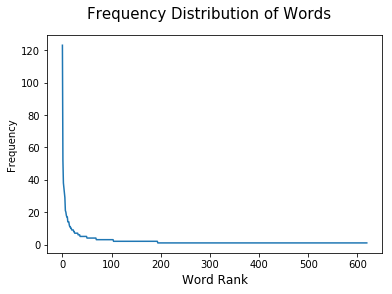





------------------------------------------------------------------
 Bigrams Grammer Before and After Smoothing 
------------------------------------------------------------------
         ('a', 'similar') - Raw: 0.0000, Smoothed: 0.0031
('similar', 'resolution') - Raw: 0.0000, Smoothed: 0.0032
 ('resolution', 'passed') - Raw: 0.0000, Smoothed: 0.0032
         ('passed', 'in') - Raw: 0.0000, Smoothed: 0.0032
            ('in', 'the') - Raw: 0.1724, Smoothed: 0.0092
        ('the', 'senate') - Raw: 0.0000, Smoothed: 0.0027
------------------------------------------------------------------


****************************************Thank You**********************************************


In [11]:
# main function call 

max_count_bigram = -1
max_count_word = 10

text = "A similar resolution passed in the Senate"

input_file = "data/SnapshotBROWN.pos.all.txt"
output_file = "out/SnapshotBROWN.pos.all_clean.txt"
word_pos, bi_gram, smoothed_bigram = assignment5_result_main(input_file, output_file, text, max_count_bigram, max_count_word)
